In [9]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6efc3e8b-6aef-499b-b2f2-61be25148a97',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-03-27T14:02:39.202Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [10]:
type(data)

dict

In [11]:
import pandas as pd

pd.set_option('display.max_rows',None)

In [12]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966571e+07,1.966571e+07,...,52.1041,1.469401e+12,None,2024-03-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
1,1027,Ethereum,ETH,ethereum,8658,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200732e+08,1.200732e+08,...,16.2086,4.280612e+11,None,2024-03-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
2,825,Tether USDt,USDT,tether,80390,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.043621e+11,1.077926e+11,...,3.9513,1.077805e+11,None,2024-03-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-27 17:02:44.647562
3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495366e+08,1.495366e+08,...,3.2514,8.586746e+10,None,2024-03-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.443067e+08,5.727485e+08,...,3.1289,1.064347e+11,None,2024-03-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
5,52,XRP,XRP,xrp,1279,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,...,1.2869,6.186385e+10,None,2024-03-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
6,3408,USDC,USDC,usd-coin,17674,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.228730e+10,3.228730e+10,...,1.2225,3.228598e+10,None,2024-03-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-27 17:02:44.647562
7,74,Dogecoin,DOGE,dogecoin,939,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.436392e+11,1.436392e+11,...,1.0045,2.652707e+10,None,2024-03-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
8,2010,Cardano,ADA,cardano,1120,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.557876e+10,3.674282e+10,...,0.8767,2.925763e+10,None,2024-03-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562
9,5805,Avalanche,AVAX,avalanche,695,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,3.774165e+08,4.361062e+08,...,0.7739,3.872383e+10,None,2024-03-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:02:44.647562


In [74]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6efc3e8b-6aef-499b-b2f2-61be25148a97',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    
    
    if not os.path.isfile(r'C:\Users\HomePC\Desktop\Python\API2.csv'):
        df.to_csv(r'C:\Users\HomePC\Desktop\Python\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\HomePC\Desktop\Python\API.csv',mode='a',header=False)


In [18]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API RUNNER COMPLETED")
    sleep(60)   #sleep for one minute
exit()

{'status': {'timestamp': '2024-03-27T14:09:30.788Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:10:32.131Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:11:33.450Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:12:34.701Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:13:35.995Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:14:37.184Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9293}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-03-27T14:25:56.555Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 9294}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [15]:
# df72=pd.read_csv(r'C:\Users\HomePC\Desktop\Python\API.csv')
# df72

In [19]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966571e+07,1.966571e+07,...,52.2532,1.457179e+12,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
1,1027,Ethereum,ETH,ethereum,8658,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200732e+08,1.200732e+08,...,16.1317,4.251957e+11,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
2,825,Tether USDt,USDT,tether,80390,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.043621e+11,1.077926e+11,...,3.9578,1.077467e+11,None,2024-03-27T14:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-27 17:07:59.454038
3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495366e+08,1.495366e+08,...,3.2710,8.542299e+10,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.443067e+08,5.727485e+08,...,3.1026,1.053704e+11,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
5,52,XRP,XRP,xrp,1279,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,...,1.2851,6.145786e+10,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
6,3408,USDC,USDC,usd-coin,17674,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.228730e+10,3.228730e+10,...,1.2358,3.227269e+10,None,2024-03-27T14:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-27 17:07:59.454038
7,74,Dogecoin,DOGE,dogecoin,939,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.436392e+11,1.436392e+11,...,1.0022,2.617278e+10,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
8,2010,Cardano,ADA,cardano,1120,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.557876e+10,3.674282e+10,...,0.8744,2.902831e+10,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
9,5805,Avalanche,AVAX,avalanche,695,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,3.774165e+08,4.361062e+08,...,0.7722,3.843685e+10,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038


In [26]:
pd.set_option('display.float_format', lambda x: '%.2e' % x)

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19665712.00,19665712.00,False,NaN,1,NaN,NaN,None,2024-03-27T14:07:00.000Z,69389.46,36624926638.14,-17.16,-2.17,-1.65,8.96,35.23,66.22,62.43,1364593041387.53,52.25,1457178558759.44,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
1,1027,Ethereum,ETH,ethereum,8658,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120073215.07,120073215.07,True,NaN,2,NaN,NaN,None,2024-03-27T14:06:00.000Z,3541.14,17300168549.32,-18.44,-2.11,-1.86,6.00,15.44,56.17,48.06,425195664092.37,16.13,425195664092.37,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
2,825,Tether USDt,USDT,tether,80390,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,104362092743.91,107792615137.11,True,NaN,3,NaN,NaN,None,2024-03-27T14:06:00.000Z,1.00,79011882130.88,-9.29,-0.02,-0.02,-0.01,-0.04,-0.03,-0.10,104317682107.96,3.96,107746744663.81,None,2024-03-27T14:06:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-27 17:07:59.454038
3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149536620.39,149536620.39,False,NaN,4,NaN,NaN,None,2024-03-27T14:06:00.000Z,571.25,2082045197.50,-2.72,-1.49,-2.22,8.46,44.86,88.41,70.66,85422990618.97,3.27,85422990618.97,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444306678.53,572748455.48,True,NaN,5,NaN,NaN,None,2024-03-27T14:06:00.000Z,183.97,3747281818.96,-0.34,-2.35,-4.35,6.93,80.57,99.69,82.75,81740539962.39,3.10,105370390038.90,None,2024-03-27T14:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
5,52,XRP,XRP,xrp,1279,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,54884241878.00,99987762348.00,False,NaN,6,NaN,NaN,None,2024-03-27T14:07:00.000Z,0.61,2018631218.52,-10.10,-1.80,-3.58,3.55,15.26,16.08,-3.46,33730679034.56,1.29,61457857265.37,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
6,3408,USDC,USDC,usd-coin,17674,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32287299828.04,32287299828.04,False,NaN,7,NaN,NaN,None,2024-03-27T14:06:00.000Z,1.00,9334681504.56,6.78,-0.04,-0.02,-0.04,-0.05,-0.06,-0.07,32272686776.90,1.24,32272686776.90,None,2024-03-27T14:06:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-27 17:07:59.454038
7,74,Dogecoin,DOGE,dogecoin,939,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143639236383.71,143639236383.71,True,NaN,8,NaN,NaN,None,2024-03-27T14:07:00.000Z,0.18,3240034383.36,-0.10,-3.59,0.57,36.63,114.32,129.14,96.83,26172780889.34,1.00,26172780889.34,None,2024-03-27T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 17:07:59.454038
8,2010,Cardano,ADA,cardano,1120,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00,35578756686.93,36742818378.51,False,NaN,9,NaN,NaN,None,2024-03-27T14:06:00.000Z,0.65,612275417.35,-7.21,-1.66,-3.19,6.46,10.35,33.78,1.69,22950915543.69,0.87,29028310588.65

In [33]:
df3=df.groupby("name",sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-2.64,-1.74,8.46,34.86,65.74,62.05
Ethereum,-2.64,-2.08,5.75,15.08,55.81,48.12
Tether USDt,0.01,-0.02,0.00,-0.03,-0.01,-0.07
BNB,-1.89,-2.36,8.34,44.77,88.12,71.43
Solana,-3.16,-4.77,6.49,79.67,98.98,83.52
XRP,-2.07,-3.81,3.27,14.98,15.87,-3.40
USDC,-0.01,-0.01,-0.02,-0.03,-0.04,-0.04
Dogecoin,-3.64,0.63,36.21,113.98,128.96,97.28
Cardano,-2.47,-3.50,6.17,9.97,33.40,1.95


In [34]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -2.64
             quote.USD.percent_change_24h    -1.74
             quote.USD.percent_change_7d      8.46
             quote.USD.percent_change_30d    34.86
             quote.USD.percent_change_60d    65.74
             quote.USD.percent_change_90d    62.05
Ethereum     quote.USD.percent_change_1h     -2.64
             quote.USD.percent_change_24h    -2.08
             quote.USD.percent_change_7d      5.75
             quote.USD.percent_change_30d    15.08
             quote.USD.percent_change_60d    55.81
             quote.USD.percent_change_90d    48.12
Tether USDt  quote.USD.percent_change_1h      0.01
             quote.USD.percent_change_24h    -0.02
             quote.USD.percent_change_7d      0.00
             quote.USD.percent_change_30d    -0.03
             quote.USD.percent_change_60d    -0.01
             quote.USD.percent_change_90d    -0.07
BNB          quote.USD.percent_change_1h

In [38]:
type(df4)


pandas.core.series.Series

In [40]:
df5=df4.to_frame(name='values')
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h    -2.64
            quote.USD.percent_change_24h   -1.74
            quote.USD.percent_change_7d     8.46
            quote.USD.percent_change_30d   34.86
            quote.USD.percent_change_60d   65.74
            quote.USD.percent_change_90d   62.05
Ethereum    quote.USD.percent_change_1h    -2.64
            quote.USD.percent_change_24h   -2.08
            quote.USD.percent_change_7d     5.75
            quote.USD.percent_change_30d   15.08
            quote.USD.percent_change_60d   55.81
            quote.USD.percent_change_90d   48.12
Tether USDt quote.USD.percent_change_1h     0.01
            quote.USD.percent_change_24h   -0.02
            quote.USD.percent_change_7d     0.00
            quote.USD.percent_change_30d   -0.03
            quote.USD.percent_change_60d   -0.01
            quote.USD.percent_change_90d   -0.07
BNB         quote.USD.percent_change_1h    -1.89
            quote.USD.percent_change_24h   -2.36
            quote.USD.percent_change_7d     8.34
            quote.USD.percent_change_30d   44.77
            quote.USD.percent_change_60d   88.12
            quote.USD.percent_change_90d   71.43
Solana      quote.USD.percent_change_1h    -3.16
            quote.USD.percent_change_24h   -4.77
            quote.USD.percent_change_7d     6.49
            quote.USD.percent_change_30d   79.67
            quote.USD.percent_change_60d   98.98
            quote.USD.percent_change_90d   83.52
XRP         quote.USD.percent_change_1h    -2.07
            quote.USD.percent_change_24h   -3.81
            quote.USD.percent_change_7d     3.27
            quote.USD.percent_change_30d   14.98
            quote.USD.percent_change_60d   15.87
            quote.USD.percent_change_90d   -3.40
USDC        quote.USD.percent_change_1h    -0.01
            quote.USD.percent_change_24h   -0.01
            quote.USD.percent_change_7d    -0.02
            quote.USD.percent_change_30d   -0.03
            quote.USD.percent_change_60d   -0.04
            quote.USD.percent_change_90d   -0.04
Dogecoin    quote.USD.percent_change_1h    -3.64
            quote.USD.percent_change_24h    0.63
            quote.USD.percent_change_7d    36.21
            quote.USD.percent_change_30d  113.98
            quote.USD.percent_change_60d  128.96
            quote.USD.percent_change_90d   97.28
Cardano     quote.USD.percent_change_1h    -2.47
            quote.USD.percent_change_24h   -3.50
            quote.USD.percent_change_7d     6.17
            quote.USD.percent_change_30d    9.97
            quote.USD.percent_change_60d   33.40
            quote.USD.percent_change_90d    1.95
Avalanche   quote.USD.percent_change_1h    -2.05
            quote.USD.percent_change_24h   -6.16
            quote.USD.percent_change_7d     1.26
            quote.USD.percent_change_30d   44.20
            quote.USD.percent_change_60d   65.86
            quote.USD.percent_change_90d   33.04
Shiba Inu   quote.USD.percent_change_1h    -3.64
            quote.USD.percent_change_24h   -2.22
            quote.USD.percent_change_7d    16.80
            quote.USD.percent_change_30d  210.98
            quote.USD.percent_change_60d  229.33
            quote.USD.percent_change_90d  180.16
Toncoin     quote.USD.percent_change_1h    -2.92
            quote.USD.percent_change_24h   -4.22
            quote.USD.percent_change_7d    19.71
            quote.USD.percent_change_30d  130.95
            quote.USD.percent_change_60d  135.57
            quote.USD.percent_change_90d  121.78
Polkadot    quote.USD.percent_change_1h    -2.76
            quote.USD.percent_change_24h   -3.76
            quote.USD.percent_change_7d     4.18
            quote.USD.percent_change_30d   22.88
            quote.USD.percent_change_60d   41.83
            quote.USD.percent_change_90d   11.83
Chainlink   quote.USD.percent_change_1h    -2.74
            quote.USD.percent_change_24h   -5.08
            quote.USD.pe

In [41]:
type(df5)


pandas.core.frame.DataFrame

In [46]:
df5.count()

values    90
dtype: int64

In [50]:
index=pd.Index(range(90))
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-2.64
1,Bitcoin,quote.USD.percent_change_24h,-1.74
2,Bitcoin,quote.USD.percent_change_7d,8.46
3,Bitcoin,quote.USD.percent_change_30d,34.86
4,Bitcoin,quote.USD.percent_change_60d,65.74
5,Bitcoin,quote.USD.percent_change_90d,62.05
6,Ethereum,quote.USD.percent_change_1h,-2.64
7,Ethereum,quote.USD.percent_change_24h,-2.08
8,Ethereum,quote.USD.percent_change_7d,5.75
9,Ethereum,quote.USD.percent_change_30d,15.08


In [53]:
df7=df6.rename(columns={'level_1':'percentage_change'})
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-2.64
1,Bitcoin,quote.USD.percent_change_24h,-1.74
2,Bitcoin,quote.USD.percent_change_7d,8.46
3,Bitcoin,quote.USD.percent_change_30d,34.86
4,Bitcoin,quote.USD.percent_change_60d,65.74
5,Bitcoin,quote.USD.percent_change_90d,62.05
6,Ethereum,quote.USD.percent_change_1h,-2.64
7,Ethereum,quote.USD.percent_change_24h,-2.08
8,Ethereum,quote.USD.percent_change_7d,5.75
9,Ethereum,quote.USD.percent_change_30d,15.08


In [59]:
df7.percentage_change=df7.percentage_change.replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24d','7d','30d','60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,-2.64
1,Bitcoin,24d,-1.74
2,Bitcoin,7d,8.46
3,Bitcoin,30d,34.86
4,Bitcoin,60d,65.74
5,Bitcoin,90d,62.05
6,Ethereum,1h,-2.64
7,Ethereum,24d,-2.08
8,Ethereum,7d,5.75
9,Ethereum,30d,15.08


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HomePC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


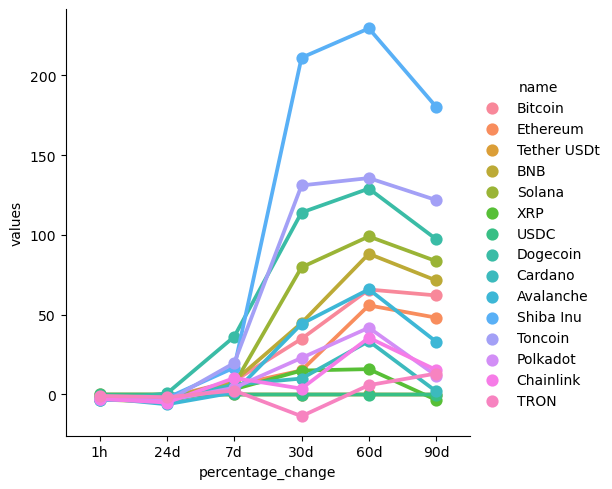

In [60]:
sns.catplot(x='percentage_change',y='values',hue='name',data=df7,kind='point')

In [70]:
df8=df[['name','quote.USD.price','timestamp']]
df9=df8.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,69389.46,2024-03-27 17:07:59.454038
15,Bitcoin,69389.46,2024-03-27 17:07:59.454038
30,Bitcoin,69098.94,2024-03-27 17:09:31.097149
45,Bitcoin,69098.94,2024-03-27 17:10:32.437037
60,Bitcoin,69167.35,2024-03-27 17:11:33.670412
75,Bitcoin,68976.13,2024-03-27 17:12:35.002582
90,Bitcoin,68859.17,2024-03-27 17:13:36.246875
105,Bitcoin,69016.78,2024-03-27 17:14:37.481925
120,Bitcoin,69763.02,2024-03-27 17:25:56.750356


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

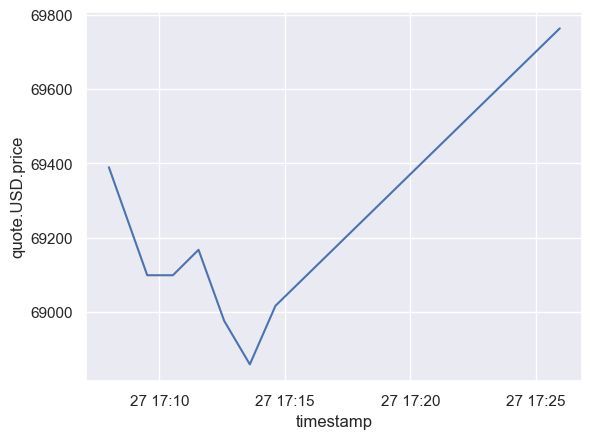

In [73]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price',data=df9)